Nearest-Neighbors Classification

In [62]:
import pandas as pd


ps: i changed to this directory (lcation of our csv file (our dataset) in my case :

cd C:\Users\USER\Downloads


In [63]:
data = pd.read_csv('weather.csv', parse_dates=True, index_col=0 )

In [64]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [65]:
data.index

DatetimeIndex(['2008-02-01', '2008-02-02', '2008-02-03', '2008-02-04',
               '2008-02-05', '2008-02-06', '2008-02-07', '2008-02-08',
               '2008-02-09', '2008-02-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', name='Date', length=3337, freq=None)

In [66]:
dataset=data[['Humidity3pm','Pressure3pm','RainTomorrow']]

In [67]:
dataset.head()

,Humidity3pm,Pressure3pm,RainTomorrow
Date,,,
2008-02-01,84.0,1017.4,Yes
2008-02-02,73.0,1016.4,Yes
2008-02-03,86.0,1015.6,Yes
2008-02-04,90.0,1011.8,Yes
2008-02-05,74.0,1004.8,Yes


In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Humidity3pm', ylabel='Pressure3pm'>

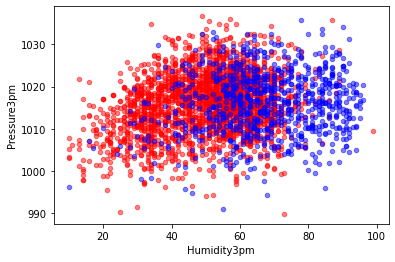

In [69]:
fig , ax = plt.subplots()
dataset[dataset['RainTomorrow'] == 'No'].plot.scatter(x='Humidity3pm', y='Pressure3pm', c='r', alpha=.5, ax=ax)
dataset[dataset['RainTomorrow']=='Yes'].plot.scatter(x='Humidity3pm', y='Pressure3pm',c='b',alpha=.5,ax=ax)



In [70]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [71]:
dataset_clean = dataset.dropna()
len(dataset), len(dataset_clean)

(3337, 3309)

In [72]:
x=dataset_clean[['Humidity3pm','Pressure3pm']]
y=dataset_clean['RainTomorrow']
y


Date
2008-02-01    Yes
2008-02-02    Yes
2008-02-03    Yes
2008-02-04    Yes
2008-02-05    Yes
             ... 
2017-06-21     No
2017-06-22     No
2017-06-23     No
2017-06-24     No
2017-06-25     No
Name: RainTomorrow, Length: 3309, dtype: object

In [73]:
y=np.array([0 if value == 'No' else 1 for value in y])

In [74]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [77]:
x_train, x_test , y_train , y_test = train_test_split(x,y, random_state =8)

In [78]:
neight = KNeighborsClassifier()
neight.fit(x_train,y_train)
y_pred = neight.predict(x_test)
accuracy_score(y_test,y_pred)

0.8055555555555556

In [82]:
sum(y==0)/len(y)

0.7407071622846781

In [88]:
x_map=np.random.rand(10000,2)
x_map

array([[0.51784004, 0.14444819],
       [0.73791948, 0.33705458],
       [0.20558287, 0.14716894],
       ...,
       [0.75948797, 0.79371568],
       [0.55307354, 0.58817062],
       [0.81205424, 0.31455677]])

In [89]:
x_map=x_map*(100,50)+(0,950)

In [90]:
x_map

array([[ 51.78400353, 957.22240964],
       [ 73.79194785, 966.85272897],
       [ 20.55828657, 957.35844689],
       ...,
       [ 75.94879722, 989.68578416],
       [ 55.30735402, 979.40853089],
       [ 81.20542373, 965.72783834]])

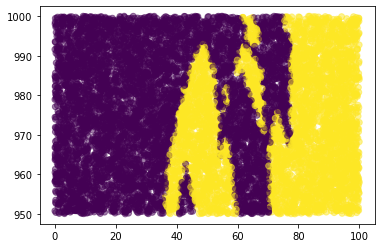

In [94]:
fig, ax = plt.subplots()
y_map = neight.predict(x_map)
ax.scatter(x=x_map[:,0], y = x_map[:,1], alpha = .5,c=y_map)

In [95]:
scores =[]
for k in range(1,100):
    n=KNeighborsClassifier(n_neighbors=k)
    n.fit(x_train,y_train)
    y_pred=n.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    scores.append(score)


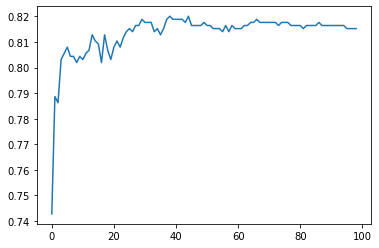

In [96]:
fig, ax = plt.subplots()
ax.plot(scores)